In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.datasets import load_breast_cancer

In [18]:
cancer = load_breast_cancer()

In [19]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## DATA VISUALIZATION AND PREPROCESSING 

In [23]:
df['target'] = cancer.target

In [24]:
df['target'] = df['target'].map({0:'benign', 1:'malignant'})

<Axes: xlabel='target', ylabel='count'>

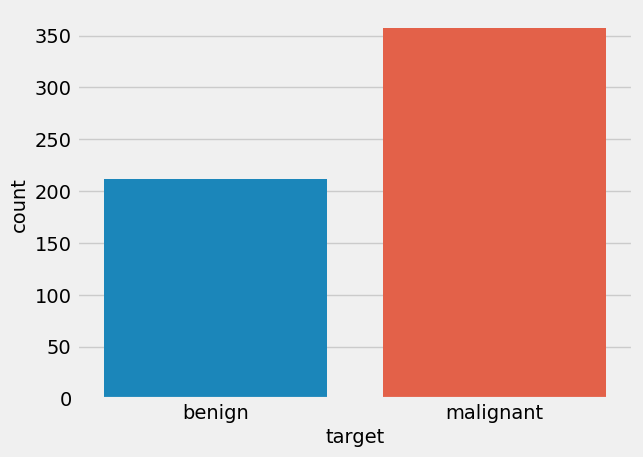

In [25]:
sns.countplot(x = 'target', data = df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Model Selection

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Machine Learning Classification

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Support Vector Machine

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
svm = SVC()

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator = svm, param_grid = params)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [33]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9119303797468354
SVC(C=1, gamma=0.001)


In [34]:
svm = SVC(C=1, gamma=0.001)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

### Decision Tree

In [35]:
dtree = DecisionTreeClassifier()

params = {'max_depth': range(2,8,2), 
          'min_samples_split': range(2,8,2),
          'min_samples_leaf': range(1,4,1),
          'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = dtree, param_grid = params)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 8, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 8, 2)})

In [36]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9347468354430379
DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_split=4)


In [37]:
dtree = DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=3)

## Model Evaluation

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print('Logistic Regression:')
print('    Classification Report: \n', classification_report(y_test, lr.predict(X_test)))
print('    Confusion Matrix: \n', confusion_matrix(y_test, lr.predict(X_test)))
print('\n')

print('Support Vector Classifier:')
print('    Classification Report: \n', classification_report(y_test, svm.predict(X_test)))
print('    Confusion Matrix: \n', confusion_matrix(y_test, svm.predict(X_test)))
print('\n')

print('Decision Tree:')
print('    Classification Report: \n', classification_report(y_test, dtree.predict(X_test)))
print('    Confusion Matrix: \n', confusion_matrix(y_test, dtree.predict(X_test)))
print('\n')


Logistic Regression:
    Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

    Confusion Matrix: 
 [[ 59   4]
 [  1 107]]


Support Vector Classifier:
    Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.97      0.92      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

    Confusion Matrix: 
 [[60  3]
 [ 9 99]]


Decision Tree:
    Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94    

## Decision Tree Feature Importances

In [ ]:
df_imp = pd.DataFrame({'Feature Name': cancer.feature_names,
                      'Importance': dtree.feature_importances_ })

NameError: name 'pd' is not defined

In [66]:
df_imp = df_imp.sort_values(by = 'Importance', ascending = False). head()

Text(0.5, 1.0, 'Feature Importance of \n Each Attribute (Decision Tree)')

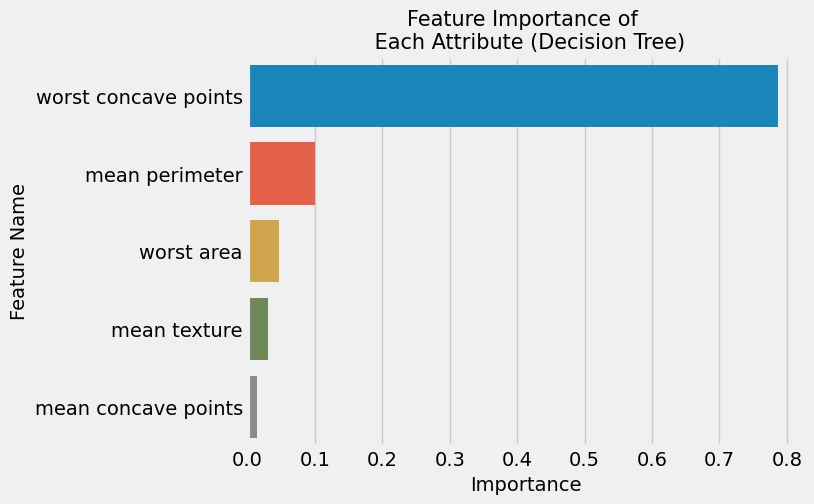

In [73]:
sns.barplot(x = 'Importance', y = 'Feature Name', data = df_imp)
plt.title('Feature Importance of \n Each Attribute (Decision Tree)', fontsize = 15)

## Cancer Classification Using TensorFlow Keras

### Scaling Values

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train.shape

(398, 30)

### Model Creation

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [88]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 25)

model = Sequential()

model.add(Dense(32, input_shape = (None,30), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [89]:
model.fit(X_train, y_train,  epochs = 300, validation_data = (X_test, y_test),
         callbacks = [early_stop])

Epoch 1/300
13/13 [==============================] - 2s 27ms/step - loss: 0.6931 - accuracy: 0.4698 - val_loss: 0.6700 - val_accuracy: 0.7953
Epoch 2/300
13/13 [==============================] - 0s 7ms/step - loss: 0.6663 - accuracy: 0.6558 - val_loss: 0.6444 - val_accuracy: 0.8655
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.7261 - val_loss: 0.6102 - val_accuracy: 0.9181
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 0.6118 - accuracy: 0.8040 - val_loss: 0.5698 - val_accuracy: 0.9064
Epoch 5/300
13/13 [==============================] - 0s 6ms/step - loss: 0.5733 - accuracy: 0.8317 - val_loss: 0.5247 - val_accuracy: 0.9006
Epoch 6/300
13/13 [==============================] - 0s 6ms/step - loss: 0.5429 - accuracy: 0.8141 - val_loss: 0.4775 - val_accuracy: 0.9064
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 0.8342 - val_loss: 0.4272 - val_accuracy: 0.9064
Epoch 8/300


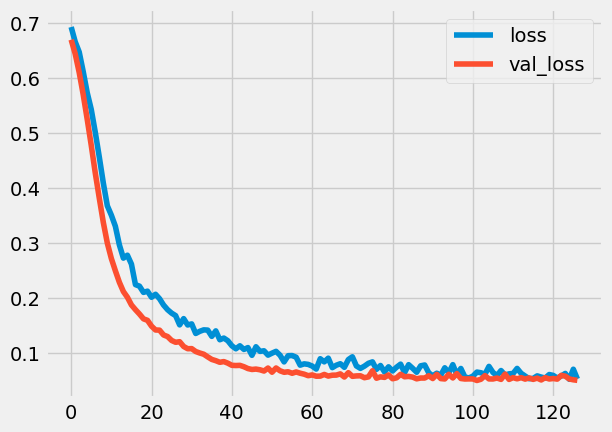

In [95]:
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()

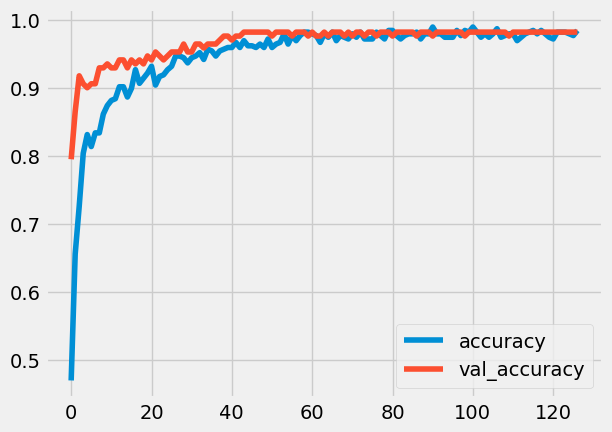

In [96]:
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

## Model Evaluation

In [97]:
predict_x = model.predict(X_test)
y_pred = np.round(predict_x).astype(int)

6/6 [==============================] - 0s 2ms/step


In [98]:
print('Deep Learning:')
print('    Classification Report: \n', classification_report(y_test, y_pred))
print('    Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Deep Learning:
    Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

    Confusion Matrix: 
 [[ 62   1]
 [  2 106]]
